In [7]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [8]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)


In [9]:
svm_clf = Pipeline([
    ("Scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
])
clf = svm_clf.fit(X,y)

In [15]:
decision_function = clf.decision_function(X)



In [18]:
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

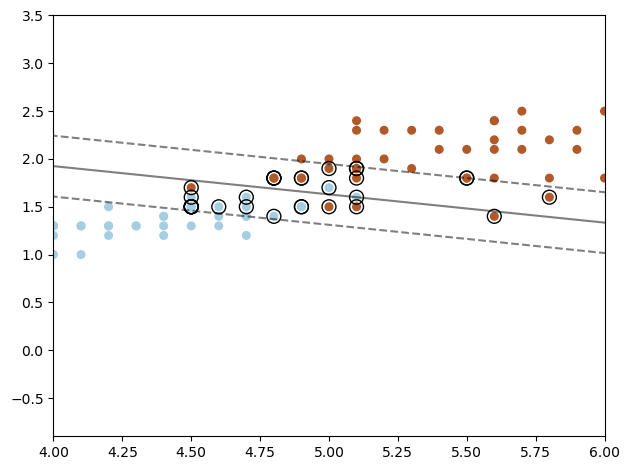

In [25]:
 plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
 ax = plt.gca()
 DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.xlim(4.0, 6)
plt.tight_layout()